# S&P 500 Time Series Analysis

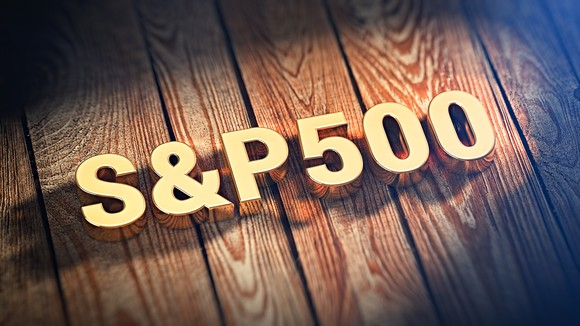

#### Dataset Reference
- The dataset was downloaded from Kaggle whose author is Nandan Pandey
- Dataset source: https://www.kaggle.com/awadhi123/finance-data-sp-500

#### Dataset Content
- Date: Date of the Stock Data __(from 01/03/2000 to 07/20/2020)__
- Close/Last: Last close price of the company's shares on the relevant stock exchange
- Volume: Number of shares sold, traded over a certain period of time (Usually Daily)
- Open: Opening price of company's shares
- High: Highest price at which a stock traded during the trading day
- Low: Lowest price at which a stock traded during the trading day

#### Project Content
- [Volume Weighted Average Price (VWAP)](#Volume-Weighted-Average-Price-(VWAP))
- [Averages by Day of Week](#Averages-by-Day-of-Week)
- [Simple Moving Average (SMA)](#Simple-Moving-Average-(SMA))
- [Weighted Moving Average (WMA)](#Weighted_Moving_Average_(WMA))
- [Exponential Moving Average (EMA)](#Exponential-Moving-Average-(EMA))

In [1]:
import numpy as np
import pandas as pd
import datetime, calendar

import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc

import matplotlib.dates as mdates

np.set_printoptions(suppress=True, precision=2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
data = "https://www.dropbox.com/s/pmsiyef75m16jj2/SP500.csv?dl=1"

In [3]:
df = pd.read_csv(data, index_col='Date', parse_dates=True)
df = df.round(2)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.25,1478.00,1438.36,1455.22,1455.22,931800000
2000-01-04,1455.22,1455.22,1397.43,1399.42,1399.42,1009000000
2000-01-05,1399.42,1413.27,1377.68,1402.11,1402.11,1085500000
2000-01-06,1402.11,1411.90,1392.10,1403.45,1403.45,1092300000
2000-01-07,1403.45,1441.47,1400.73,1441.47,1441.47,1225200000
...,...,...,...,...,...,...
2020-07-14,3141.11,3200.95,3127.66,3197.52,3197.52,4476170000
2020-07-15,3225.98,3238.28,3200.76,3226.56,3226.56,4669760000
2020-07-16,3208.36,3220.39,3198.59,3215.57,3215.57,3961230000


In [4]:
df.mean()          #Showing average price of each column

Open              1613.17
High              1622.57
Low               1602.95
Close             1613.35
Adj Close         1613.35
Volume      3152756538.98
dtype: float64

## Volume Weighted Average Price (VWAP)

In [5]:
vwap = np.average(df['Adj Close'], weights = df['Volume'])
print("Volume Weighted Average Price of S&P 500 from 01/2000 to 07/2020 is", vwap.round(2))

Volume Weighted Average Price of S&P 500 from 01/2000 to 07/2020 is 1682.85


## Averages by Day of Week

In [7]:
AvgByDW = df.groupby(df.index.dayofweek)['Adj Close'].mean().round(2)
AvgByDW.index = [calendar.day_name[index] for index in AvgByDW.index]
AvgByDW

Monday      1613.28
Tuesday     1613.31
Wednesday   1610.26
Thursday    1615.22
Friday      1614.72
Name: Adj Close, dtype: float64

## Simple Moving Average (SMA)

In [8]:
#Since the 200-day moving average is considered especially significant in stock trading, I'll use N = 200
N = 200

In [9]:
df['SMA'] = df['Adj Close'].rolling(window=N).mean().round(2)
df

,Open,High,Low,Close,Adj Close,Volume,SMA
Date,,,,,,,
2000-01-03,1469.25,1478.00,1438.36,1455.22,1455.22,931800000,nan
2000-01-04,1455.22,1455.22,1397.43,1399.42,1399.42,1009000000,nan
2000-01-05,1399.42,1413.27,1377.68,1402.11,1402.11,1085500000,nan
2000-01-06,1402.11,1411.90,1392.10,1403.45,1403.45,1092300000,nan
2000-01-07,1403.45,1441.47,1400.73,1441.47,1441.47,1225200000,nan
...,...,...,...,...,...,...,...
2020-07-14,3141.11,3200.95,3127.66,3197.52,3197.52,4476170000,3029.13
2020-07-15,3225.98,3238.28,3200.76,3226.56,3226.56,4669760000,3030.45
2020-07-16,3208.36,3220.39,3198.59,3215.57,3215.57,3961230000,3031.65


In [10]:
# the number of days since a default epoch of 1970-01-01 UTC
df['mDate'] = mdates.date2num(df.index)
df

,Open,High,Low,Close,Adj Close,Volume,SMA,mDate
Date,,,,,,,,
2000-01-03,1469.25,1478.00,1438.36,1455.22,1455.22,931800000,nan,730122.00
2000-01-04,1455.22,1455.22,1397.43,1399.42,1399.42,1009000000,nan,730123.00
2000-01-05,1399.42,1413.27,1377.68,1402.11,1402.11,1085500000,nan,730124.00
2000-01-06,1402.11,1411.90,1392.10,1403.45,1403.45,1092300000,nan,730125.00
2000-01-07,1403.45,1441.47,1400.73,1441.47,1441.47,1225200000,nan,730126.00
...,...,...,...,...,...,...,...,...
2020-07-14,3141.11,3200.95,3127.66,3197.52,3197.52,4476170000,3029.13,737620.00
2020-07-15,3225.98,3238.28,3200.76,3226.56,3226.56,4669760000,3030.45,737621.00
2020-07-16,3208.36,3220.39,3198.59,3215.57,3215.57,3961230000,3031.65,737622.00


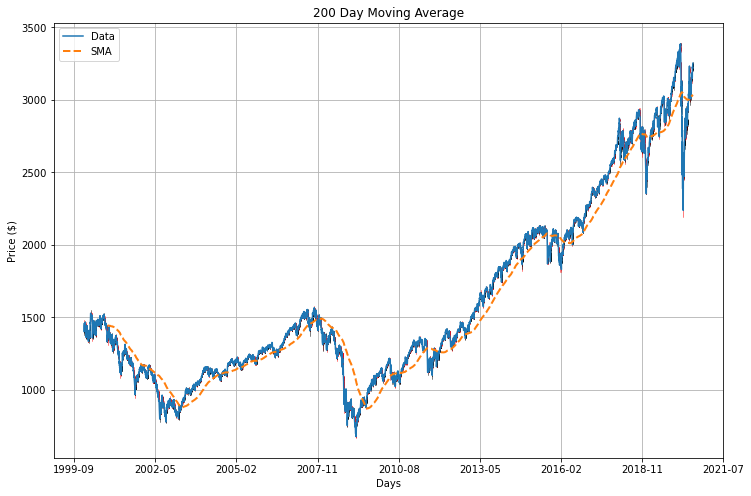

In [11]:
olhc = df[['mDate', 'Open', 'High', 'Low', 'Adj Close']].copy().values          #Getting values of each olhc price

fig, ax = plt.subplots(1, figsize=(12,8))
candlestick_ohlc(ax, olhc)

plt.plot(df['mDate'], df['Adj Close'], label='Data')
plt.plot(df['mDate'], df['SMA'], '--', lw=2.0, label='SMA')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.title("200 Day Moving Average")
plt.xlabel("Days")
plt.ylabel("Price ($)")
plt.grid()
plt.legend()
plt.show()          

#After the Great Recession in 2008, the S&P 500 steadily increases until now with the recent significant drop, 
#although it jumps up back again from that. That recent drop seems to be the impact of COVID-19

#As the SMA is an unweighted moving average, its graph forms the rough trends of data compared to the actual data graph

## Weighted Moving Average (WMA)

In [12]:
weights = np.arange(1, N+1)          #I'll keep using 200-day moving period

def weighted1(w):                    #WMA = (Sum of Weighted Averages) / (Sum of Weight)
    def weighted2(x):              
        return np.sum(x*w)/sum(w)
    return weighted2                 #Returns WMA

In [13]:
df['WMA'] = df[['Adj Close']].rolling(window=N).apply(weighted1(weights))
df

,Open,High,Low,Close,Adj Close,Volume,SMA,mDate,WMA
Date,,,,,,,,,
2000-01-03,1469.25,1478.00,1438.36,1455.22,1455.22,931800000,nan,730122.00,nan
2000-01-04,1455.22,1455.22,1397.43,1399.42,1399.42,1009000000,nan,730123.00,nan
2000-01-05,1399.42,1413.27,1377.68,1402.11,1402.11,1085500000,nan,730124.00,nan
2000-01-06,1402.11,1411.90,1392.10,1403.45,1403.45,1092300000,nan,730125.00,nan
2000-01-07,1403.45,1441.47,1400.73,1441.47,1441.47,1225200000,nan,730126.00,nan
...,...,...,...,...,...,...,...,...,...
2020-07-14,3141.11,3200.95,3127.66,3197.52,3197.52,4476170000,3029.13,737620.00,3004.05
2020-07-15,3225.98,3238.28,3200.76,3226.56,3226.56,4669760000,3030.45,737621.00,3006.01
2020-07-16,3208.36,3220.39,3198.59,3215.57,3215.57,3961230000,3031.65,737622.00,3007.85


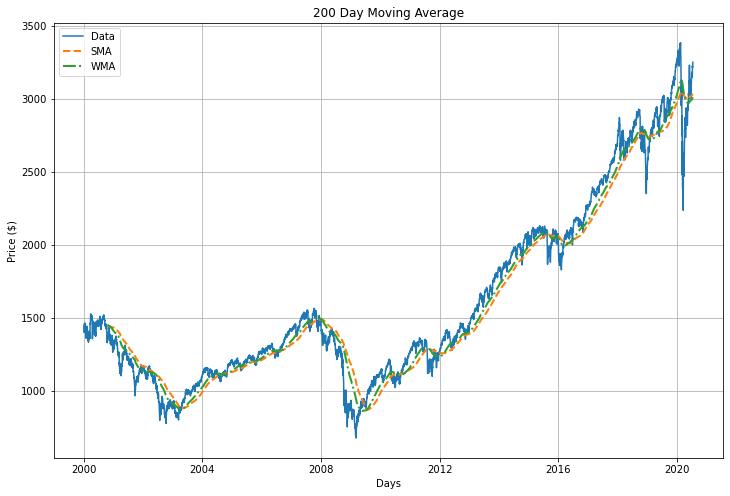

In [14]:
fig, ax = plt.subplots(1, figsize=(12,8))

plt.plot(df.index, df['Adj Close'], label='Data')
plt.plot(df.index, df['SMA'], '--', lw=2.0, label='SMA')
plt.plot(df.index, df['WMA'], '-.', lw=2.0, label='WMA')

plt.title("200 Day Moving Average")
plt.xlabel("Days")
plt.ylabel("Price ($)")
plt.grid()
plt.legend()
plt.show()

#Here I plotted the actual graph, SMA and WMA for comparison. The WMA graph is slightly closer to the actual graph

## Exponential Moving Average (EMA)

In [15]:
df['EMA'] = df[['Adj Close']].ewm(alpha=0.5, min_periods=N).mean()          #Here, I used a = 0.5 for the degree of
df                                                                          #weighting decrease. Note that N = 200.

,Open,High,Low,Close,Adj Close,Volume,SMA,mDate,WMA,EMA
Date,,,,,,,,,,
2000-01-03,1469.25,1478.00,1438.36,1455.22,1455.22,931800000,nan,730122.00,nan,nan
2000-01-04,1455.22,1455.22,1397.43,1399.42,1399.42,1009000000,nan,730123.00,nan,nan
2000-01-05,1399.42,1413.27,1377.68,1402.11,1402.11,1085500000,nan,730124.00,nan,nan
2000-01-06,1402.11,1411.90,1392.10,1403.45,1403.45,1092300000,nan,730125.00,nan,nan
2000-01-07,1403.45,1441.47,1400.73,1441.47,1441.47,1225200000,nan,730126.00,nan,nan
...,...,...,...,...,...,...,...,...,...,...
2020-07-14,3141.11,3200.95,3127.66,3197.52,3197.52,4476170000,3029.13,737620.00,3004.05,3180.06
2020-07-15,3225.98,3238.28,3200.76,3226.56,3226.56,4669760000,3030.45,737621.00,3006.01,3203.31
2020-07-16,3208.36,3220.39,3198.59,3215.57,3215.57,3961230000,3031.65,737622.00,3007.85,3209.44


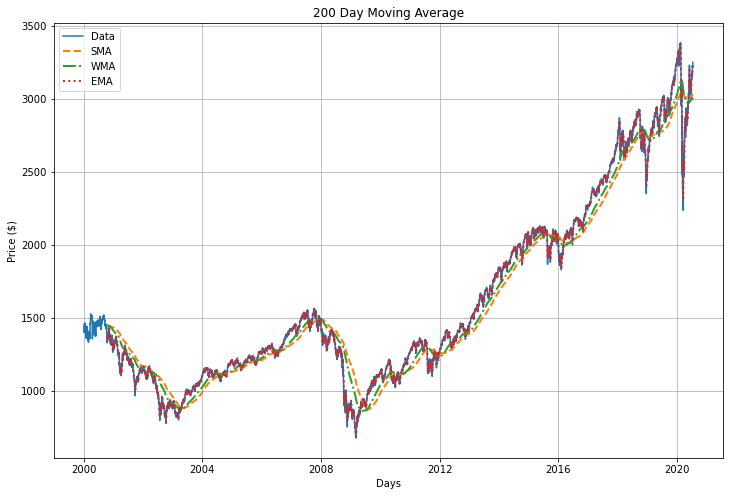

In [16]:
fig, ax = plt.subplots(1, figsize=(12,8))

plt.plot(df.index, df['Adj Close'], label='Data')
plt.plot(df.index, df['SMA'], '--', lw=2.0, label='SMA')
plt.plot(df.index, df['WMA'], '-.', lw=2.0, label='WMA')
plt.plot(df.index, df['EMA'], ':',  lw=2.0, label="EMA")


plt.title("200 Day Moving Average")
plt.xlabel("Days")
plt.ylabel("Price ($)")
plt.grid()
plt.legend()
plt.show()

#Lastly, I plotted all four graphs here. The EMA graph is the closest to the actual data graph